# Keras Sequential Model 

In [89]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import random

### Leo los datos

In [8]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [9]:
n_imagenes, height, width = train_X.shape
print("Hay {} imágenes de {}x{} pixeles en el dataset de entrenamiento".format(n_imagenes, height, width))

Hay 60000 imágenes de 28x28 pixeles en el dataset de entrenamiento


In [14]:
def plot_image(img_matrix: np.ndarray):
    # dada una matriz de pixeles, la grafica
    plt.imshow(img_matrix, cmap=plt.get_cmap('gray'))
    plt.show()

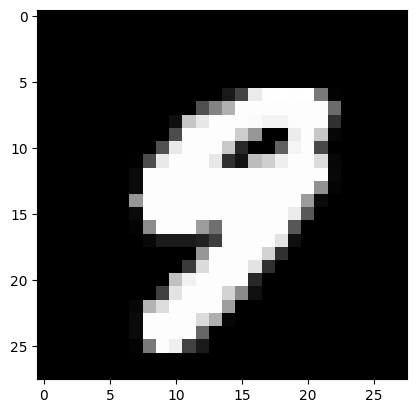

In [90]:
j = random.randint(0, n_imagenes)
sample_img = train_X[j]

plot_image(sample_img)

### Armo el  modelo

In [102]:
model = keras.Sequential([
    layers.Flatten(input_shape=(height,width)),
    layers.Dense(100, activation='relu'),
    layers.Dense(50, activation='relu'),
    layers.Dense(10, activation='linear'),
], name="mnist_model")

model.compile(
    optimizer=keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[keras.metrics.SparseCategoricalAccuracy()]
)

### Entrenamos el modelo

In [103]:
model.fit(train_X, train_y, epochs=6)

Epoch 1/6
1875/1875 [==============================] - 8s 4ms/step - loss: 2.1238 - sparse_categorical_accuracy: 0.8601
Epoch 2/6
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3625 - sparse_categorical_accuracy: 0.9204
Epoch 3/6
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2359 - sparse_categorical_accuracy: 0.9393
Epoch 4/6
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1904 - sparse_categorical_accuracy: 0.9471
Epoch 5/6
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1591 - sparse_categorical_accuracy: 0.9556
Epoch 6/6
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1376 - sparse_categorical_accuracy: 0.9612


### Hacemos predicciones con el modelo

In [104]:
model.predict(np.array([sample_img])).argmax()

1/1 [==============================] - 0s 91ms/step


9

## Evaluamos al modelo con metricas

In [105]:
score = model.evaluate(test_X, test_y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.15475089848041534
Test accuracy: 0.9585999846458435
